Columnas originales: ['status_id', 'status_type', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3', 'Column4']
Usando variables: ['num_reactions', 'num_comments', 'num_shares']


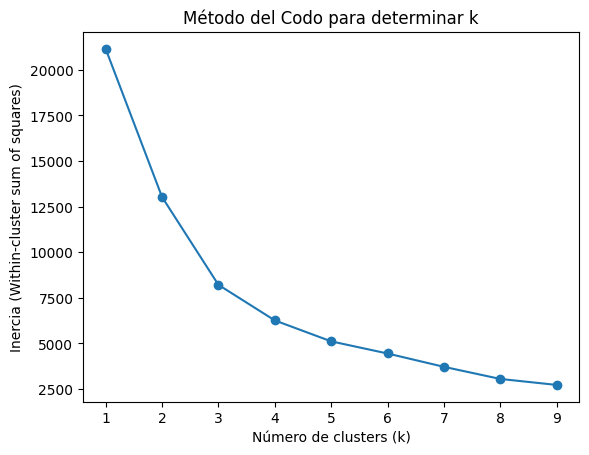


Centros de los clusters (en escala original):
   num_reactions  num_comments  num_shares
0     113.026250     86.440742   19.004873
1     695.360656   3282.780328  507.373770
2    1804.616188     79.702350   16.973890


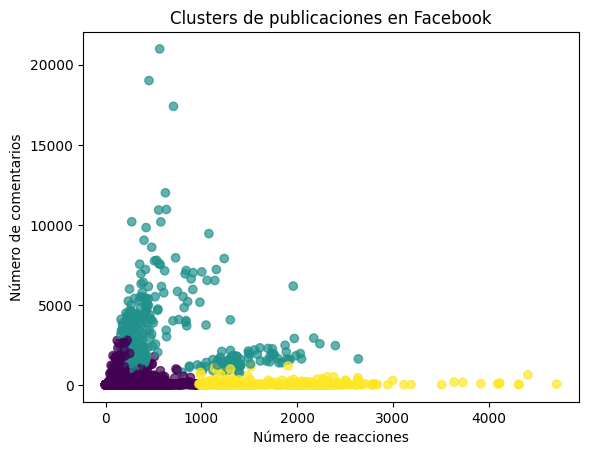

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/Users/emilyramos/Desktop/pythom/Facebook_Marketplace_data.csv")
print("Columnas originales:", df.columns.tolist())

#  Limpieza de datos
columnas_vacias = [col for col in df.columns if df[col].isnull().all()]
df = df.drop(columns=columnas_vacias)

# Variables numéricas relevantes 
vars_cluster = ["num_reactions", "num_comments", "num_shares"]
df_cluster = df[vars_cluster].dropna()

print(f"Usando variables: {vars_cluster}")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

#  Determinar k 
inercia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

plt.plot(k_values, inercia, marker='o')
plt.title("Método del Codo para determinar k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (Within-cluster sum of squares)")
plt.show()

# k determinado
k_optimo = 3
modelo = KMeans(n_clusters=k_optimo, random_state=42)
modelo.fit(X_scaled)

df_cluster["cluster"] = modelo.labels_
print("\nCentros de los clusters (en escala original):")
centros = pd.DataFrame(scaler.inverse_transform(modelo.cluster_centers_),
    columns=vars_cluster)
print(centros)

plt.scatter(df_cluster["num_reactions"], df_cluster["num_comments"],
    c=df_cluster["cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("Número de reacciones")
plt.ylabel("Número de comentarios")
plt.title("Clusters de publicaciones en Facebook")
plt.show()
